Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.478 seconds.
Prefix dict has been built successfully.


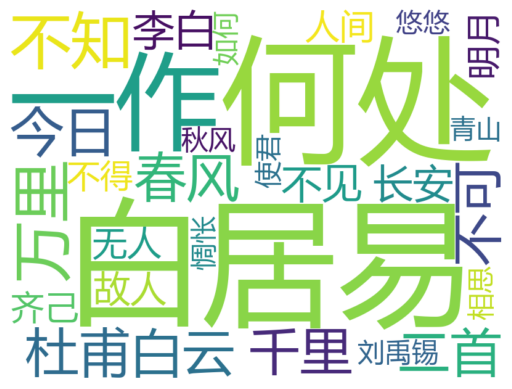

In [2]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
with open('全唐诗.txt', 'r') as f:
    tang_poems = f.read()
# 拼接成整个字符串
corpus = ''.join(tang_poems)
# 标记词语
tokens = jieba.lcut(corpus)
# 计算词语频率
freqs = {}
for token in tokens:
    if len(token) == 1:  # Exclude single-character tokens
        continue
    freqs[token] = freqs.get(token, 0) + 1
# 统计高频词
sorted_freqs = sorted(freqs.items(), key=lambda x: x[1], reverse=True)
# 前50个高频词
top50_chars = [item[0] for item in sorted_freqs[:50]]
# 生成词云
wordcloud = WordCloud(font_path='msyh.ttc', width=800, height=600,
                      background_color='white').generate(' '.join(top50_chars))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

春天出现的次数是： 13132
夏天出现的次数是： 1933
秋天出现的次数是： 9768
冬天出现的次数是： 908


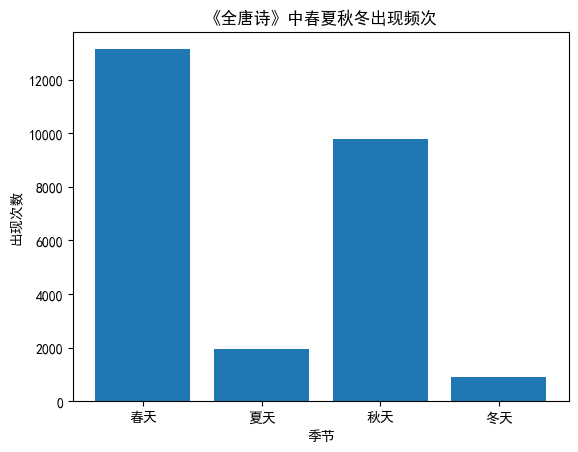

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
with open('全唐诗.txt', 'r') as f:
    contents = f.read()
spring_count = contents.count('春')
summer_count = contents.count('夏') + contents.count('暑')
autumn_count = contents.count('秋')
winter_count = contents.count('冬')
print('春天出现的次数是：', spring_count)
print('夏天出现的次数是：', summer_count)
print('秋天出现的次数是：', autumn_count)
print('冬天出现的次数是：', winter_count)
plt.bar(['春天', '夏天', '秋天', '冬天'], [spring_count,
        summer_count, autumn_count, winter_count])
plt.title('《全唐诗》中春夏秋冬出现频次')
plt.xlabel('季节')
plt.ylabel('出现次数')
plt.show()


In [4]:
import jieba
import os
with open('全唐诗.txt','r',encoding='utf-8') as f:
    text = f.read()
words = jieba.lcut(text)
with open('地名.txt','r',encoding='utf-8') as f:
    place_list = f.read().splitlines()
place_count = {}
for word in words:
    if word in place_list:
        place_count[word] = place_count.get(word,0) + 1
sorted_place_count = sorted(place_count.items(),key=lambda x: x[1], reverse=True)
for place, count in sorted_place_count:
    print(place,count)


长安 926
太原 108
杭州 102
邯郸 99
徐州 47
广州 42
长春 30
大理 23
北京 11
上海 10
南京 7
贵州 2


In [5]:
from gensim.models import Word2Vec
# 示例数据
with open('全唐诗.txt', 'r') as f:
    tang_poems = f.read()
# 将诗句进行分词
tokenized_poems = [poem.split() for poem in tang_poems]
# print(tokenized_poems)
# 训练Word2Vec模型
model = Word2Vec(tokenized_poems, vector_size=10, window=5, min_count=1, workers=4)
# 获取与给定输入字最相似的其他字
input_word = '明'
similar_words = model.wv.most_similar(input_word)
# 显示结果
print(f"与'{input_word}'最相似的字：")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.3f}")


与'明'最相似的字：
蒂: 0.834
冗: 0.821
涛: 0.819
栴: 0.818
壬: 0.804
缅: 0.793
筤: 0.786
忲: 0.775
炅: 0.763
磐: 0.757


In [6]:
import requests
from bs4 import BeautifulSoup
url = 'https://news.sina.cn/project/fy2020/yq_province.shtml?province=hebei'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)
# 获取全国疫情数据
# china_data = soup.find('div', {'class': 'areaBlock1'}).find('span').get_text()
# print('全国疫情数据：', china_data)
# # 获取省份疫情数据
# province_list = soup.find('div', {'class': 'areaBox3jZkr'}).findall('div', {'class': 'areaBlock1_3V3UU'})
# for province in province_list:
#     province_name = province.find('span', {'class': 'provinceName3t5qg'}).gettext()
#     province_data = province.find('span', {'class': 'confirmedCount_3d1jk'}).get_text()
#     print(province_name, province_data)


<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="ææºæ°æµªç½,æ°æµªé¦é¡µ,æ°é»èµè®¯,æ°æµªæ°é»,æ°æµªæ çº¿" name="keywords"/>
<meta content="ææºæ°æµªç½æ¯æ°æµªç½çææºé¨æ·ç½ç«ï¼ä¸ºäº¿ä¸ç¨æ·æé ä¸ä¸ªææºèéä¸ççè¶çº§å¹³å°ï¼æä¾24å°æ¶å¨é¢åæ¶çä¸­æèµè®¯ï¼åå®¹è¦çå½åå¤çªåæ°é»äºä»¶ãä½åèµäºãå¨±ä¹æ¶å°ãäº§ä¸èµè®¯ãå®ç¨ä¿¡æ¯ç­ãææºæ°æµªç½è§¦å±ç - sina.cn" name="description"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="no-cache, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="always" name="referrer"/>
<meta content="index, follow" name="robots"/>
<meta content="index, follow" name="googlebot"/>
<meta content="sina_mobile" name="author"/>
<script type="text/javascr

In [7]:
import pandas as pd
import pyecharts.options as opts
from pyecharts.charts import Map
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
CurrentConfig.ONLINE_HOST
covid_data = pd.read_csv('DXYArea.csv')
print(covid_data.columns)

Index(['continentName', 'continentEnglishName', 'countryName',
       'countryEnglishName', 'provinceName', 'provinceEnglishName',
       'province_zipCode', 'province_confirmedCount',
       'province_suspectedCount', 'province_curedCount', 'province_deadCount',
       'cityName', 'cityEnglishName', 'city_zipCode', 'city_confirmedCount',
       'city_suspectedCount', 'city_curedCount', 'city_deadCount',
       'updateTime'],
      dtype='object')


     provinceName  province_confirmedCount
0             云南省                     5007
18            陕西省                     5462
32            甘肃省                     1561
49       新疆维吾尔自治区                     2632
69        宁夏回族自治区                      238
75            广东省                    55674
97            湖南省                     2442
113           湖北省                    68862
131           山东省                     4564
165           福建省                     7326
177           江苏省                     3796
192          黑龙江省                     5389
207           辽宁省                     3023
223           吉林省                    40481
236        内蒙古自治区                     8237
250           山西省                     5006
262           北京市                    25249
428           浙江省                     5858
442           河北省                     2839
468           四川省                    11315
611           上海市                    64978
631            香港                   478020
632        

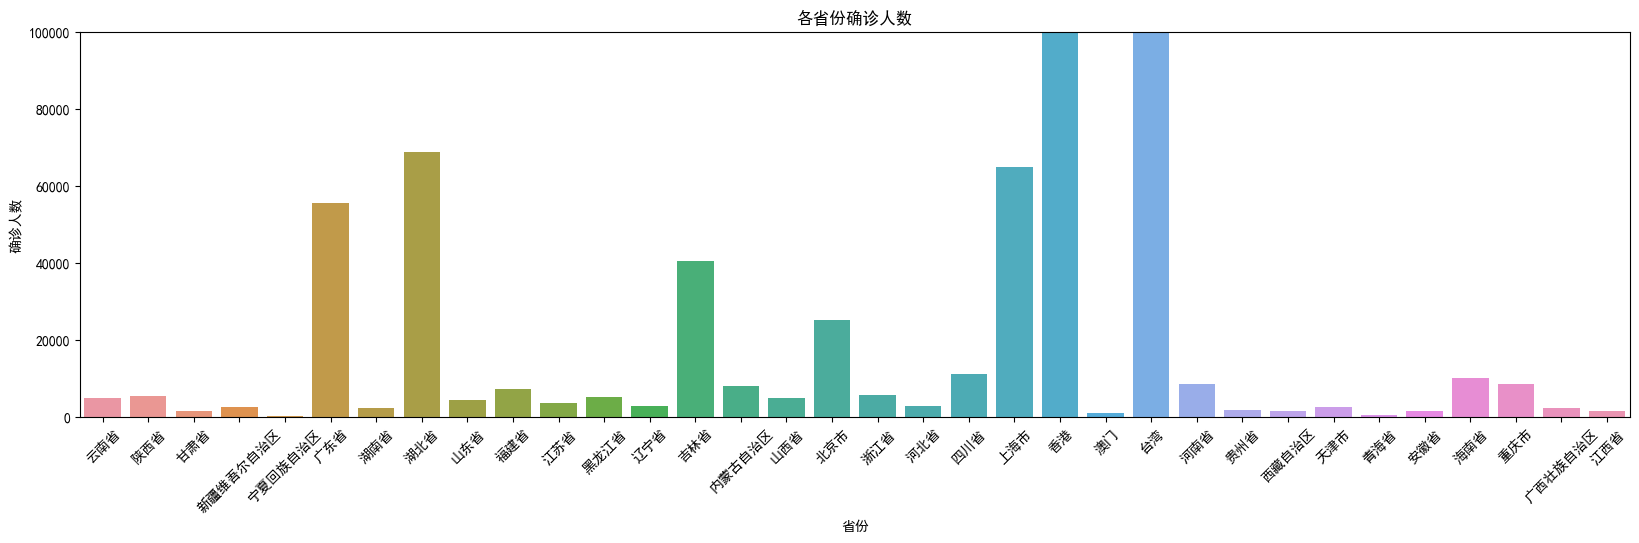

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
new_data = covid_data[covid_data['countryName'] == '中国']
new_data = new_data[['provinceName', 'province_confirmedCount']]
new_data = new_data.drop_duplicates(subset='provinceName')
new_data = new_data.loc[new_data['provinceName'] != '中国']
new_data.to_csv('中国疫情数据.csv')
print(new_data)
plt.figure(figsize=(20, 5))
sns.barplot(x='provinceName', y='province_confirmedCount',
            data=new_data, errorbar=None)
plt.title("各省份确诊人数")
plt.xlabel('省份')
plt.xticks(rotation=45)
plt.ylabel('确诊人数')
plt.ylim(0,100000)
plt.show()

  continentName  confirmedCount
0            亚洲       185908097
1            其他             762
2           北美洲       121106923
3           南美洲        65658608
4           大洋洲        13214465
5            欧洲       242267067
6            非洲        12697203


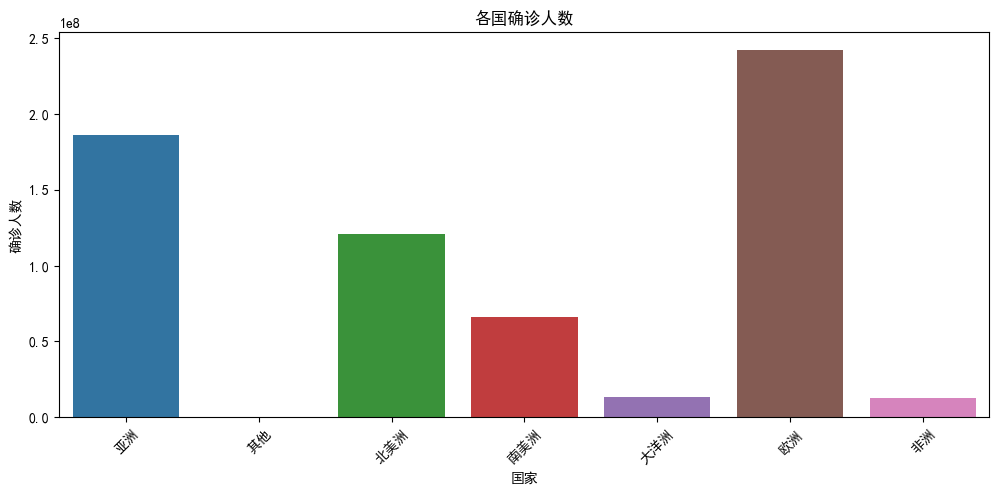

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
new_data = covid_data[['continentName','countryName', 'province_confirmedCount']]
new_data = new_data.drop_duplicates(subset='countryName')
grouped = new_data.groupby('continentName')['province_confirmedCount'].sum()
grouped = grouped.reset_index()
grouped.columns = ['continentName', 'confirmedCount']
new_data.to_csv('世界疫情数据.csv')
print(grouped)
plt.figure(figsize=(12, 5))
sns.barplot(x='continentName', y='confirmedCount',
            data=grouped, errorbar=None)
plt.title("各国确诊人数")
plt.xlabel('国家')
plt.xticks(rotation=45)
plt.ylabel('确诊人数')
# plt.ylim(0,100000)
plt.show()

In [10]:
new_data = covid_data[covid_data['countryName'] == '中国']
new_data = new_data[['provinceName','province_confirmedCount']]
new_data = new_data.drop_duplicates(subset='provinceName')
new_data = new_data.loc[new_data['provinceName'] != '中国']
province=new_data["provinceName"].values.tolist()
print(new_data["provinceName"].values)
nowConfirm=new_data["province_confirmedCount"].values.tolist()
data=[]
i=0
while i< len(province):
    data.append((province[i],nowConfirm[i]))
    i+=1
print(data)
m = Map()
m.add("",data,
      maptype="china",
      is_map_symbol_show=False)
m.set_global_opts(
    title_opts=opts.TitleOpts(title="COVID-19中国现有地区现有确诊人数地图"),
    visualmap_opts=opts.VisualMapOpts(
        is_piecewise=True,
        pieces=[
            {
                "min": 50000,
                "label": '>50000',
                "color": "#893448"
            },  # 不指定 max，表示 max 为无限大
            {
                "min": 20000,
                "max": 49999,
                "label": '20000-49999',
                "color": "#ff585e"
            },
            {
                "min": 10000,
                "max": 19999,
                "label": '10000-19999',
                "color": "#fb8146"
            },
            {
                "min": 5000,
                "max": 9999,
                "label": '5000-9999',
                "color": "#ffA500"
            },
            {
                "min": 1000,
                "max": 4999,
                "label": '1000-4999',
                "color": "#ffb248"
            },
            {
                "min": 500,
                "max": 999,
                "label": '500-999',
                "color": "#fff2d1"
            },
            {
                "max": 499,
                "label": '0-499',
                "color": "#ffffff"
            }
        ]))
m.render("中国疫情地图.html")

['云南省' '陕西省' '甘肃省' '新疆维吾尔自治区' '宁夏回族自治区' '广东省' '湖南省' '湖北省' '山东省' '福建省'
 '江苏省' '黑龙江省' '辽宁省' '吉林省' '内蒙古自治区' '山西省' '北京市' '浙江省' '河北省' '四川省' '上海市'
 '香港' '澳门' '台湾' '河南省' '贵州省' '西藏自治区' '天津市' '青海省' '安徽省' '海南省' '重庆市'
 '广西壮族自治区' '江西省']
[('云南省', 5007), ('陕西省', 5462), ('甘肃省', 1561), ('新疆维吾尔自治区', 2632), ('宁夏回族自治区', 238), ('广东省', 55674), ('湖南省', 2442), ('湖北省', 68862), ('山东省', 4564), ('福建省', 7326), ('江苏省', 3796), ('黑龙江省', 5389), ('辽宁省', 3023), ('吉林省', 40481), ('内蒙古自治区', 8237), ('山西省', 5006), ('北京市', 25249), ('浙江省', 5858), ('河北省', 2839), ('四川省', 11315), ('上海市', 64978), ('香港', 478020), ('澳门', 1142), ('台湾', 8498195), ('河南省', 8692), ('贵州省', 1756), ('西藏自治区', 1522), ('天津市', 2627), ('青海省', 510), ('安徽省', 1699), ('海南省', 10287), ('重庆市', 8542), ('广西壮族自治区', 2431), ('江西省', 1547)]


'/home/dky/Github/Mine/python-practice/day14/中国疫情地图.html'

In [13]:
import pandas as pd
import pyecharts.options as opts
from pyecharts.charts import Map
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
CurrentConfig.ONLINE_HOST
covid_data = pd.read_csv('DXYArea.csv')
# 保存地图
new_data = covid_data[covid_data['provinceName'] == '北京市']
new_data = new_data[['cityName', 'city_confirmedCount']]
new_data = new_data.drop_duplicates(subset='cityName')
new_data = new_data.loc[new_data['cityName'] != '北京市']
city = new_data["cityName"].values.tolist()
nowConfirm = new_data["city_confirmedCount"].values.tolist()
data = []
i = 0
while i < len(city):
    data.append((city[i], nowConfirm[i]))
    i += 1
print(data)
m = Map()
m.add("城市", data,
      maptype="北京")
m.set_global_opts(
    title_opts=opts.TitleOpts(title="COVID-19北京现有地区现有确诊人数地图"),
    visualmap_opts=opts.VisualMapOpts(
        is_piecewise=True,
        pieces=[
            {
                "min": 50000,
                "label": '>50000',
                "color": "#893448"
            },  # 不指定 max，表示 max 为无限大
            {
                "min": 20000,
                "max": 49999,
                "label": '20000-49999',
                "color": "#ff585e"
            },
            {
                "min": 10000,
                "max": 19999,
                "label": '10000-19999',
                "color": "#fb8146"
            },
            {
                "min": 5000,
                "max": 9999,
                "label": '5000-9999',
                "color": "#ffA500"
            },
            {
                "min": 1000,
                "max": 4999,
                "label": '1000-4999',
                "color": "#ffb248"
            },
            {
                "min": 500,
                "max": 999,
                "label": '500-999',
                "color": "#fff2d1"
            },
            {
                "max": 499,
                "label": '0-499',
                "color": "#ffffff"
            }
        ]))
m.render("北京疫情地图.html")


[('朝阳区', 5675.0), ('海淀区', 2118.0), ('通州区', 1841.0), ('昌平区', 1379.0), ('丰台区', 1586.0), ('东城区', 1241.0), ('境外输入', 1518.0), ('石景山区', 875.0), ('西城区', 864.0), ('顺义区', 767.0), ('房山区', 580.0), ('大兴区', 590.0), ('门头沟区', 452.0), ('经济开发区', 418.0), ('密云区', 378.0), ('平谷区', 324.0), ('延庆区', 306.0), ('怀柔区', 305.0), ('外地来京', 27.0), ('待明确地区', 4005.0), ('境外输入人员', 142.0), ('外地来京人员', 25.0), ('未明确地区', 0.0), ('朝阳', 22.0), ('大兴', 16.0), ('西城', 13.0), ('昌平', 12.0), ('通州', 12.0), ('丰台', 11.0), ('东城', 3.0), ('石景山', 2.0), ('顺义', 2.0), ('门头沟', 1.0), ('怀柔', 1.0), ('海淀', 26.0), ('武汉来京人员', 7.0), ('不明地区', 8.0), (nan, nan)]


'/home/dky/Github/Mine/python-practice/day14/北京疫情地图.html'

In [14]:
import pandas as pd
import pyecharts.options as opts
from pyecharts.charts import Map
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
CurrentConfig.ONLINE_HOST
covid_data = pd.read_csv('DXYArea.csv')
# 保存地图
new_data = covid_data[['countryName', 'province_confirmedCount']]
new_data = new_data.drop_duplicates(subset='countryName')
country = new_data["countryName"].values.tolist()
nowConfirm = new_data["province_confirmedCount"].values.tolist()
data = []
i = 0
while i < len(country):
    data.append((country[i], nowConfirm[i]))
    i += 1
print(data)
name_map = {
    'Singapore Rep.': '新加坡',
    'Dominican Rep.': '多米尼加',
    'Palestine': '巴勒斯坦',
    'Bahamas': '巴哈马',
    'Timor-Leste': '东帝汶',
    'Afghanistan': '阿富汗',
    'Guinea-Bissau': '几内亚比绍',
    "Côte d'Ivoire": '科特迪瓦',
    'Siachen Glacier': '锡亚琴冰川',
    "Br. Indian Ocean Ter.": '英属印度洋领土',
    'Angola': '安哥拉',
    'Albania': '阿尔巴尼亚',
    'United Arab Emirates': '阿联酋',
    'Argentina': '阿根廷',
    'Armenia': '亚美尼亚',
    'French Southern and Antarctic Lands': '法属南半球和南极领地',
    'Australia': '澳大利亚',
    'Austria': '奥地利',
    'Azerbaijan': '阿塞拜疆',
    'Burundi': '布隆迪',
    'Belgium': '比利时',
    'Benin': '贝宁',
    'Burkina Faso': '布基纳法索',
    'Bangladesh': '孟加拉国',
    'Bulgaria': '保加利亚',
    'The Bahamas': '巴哈马',
    'Bosnia and Herz.': '波斯尼亚和黑塞哥维那',
    'Belarus': '白俄罗斯',
    'Belize': '伯利兹',
    'Bermuda': '百慕大',
    'Bolivia': '玻利维亚',
    'Brazil': '巴西',
    'Brunei': '文莱',
    'Bhutan': '不丹',
    'Botswana': '博茨瓦纳',
    'Central African Rep.': '中非',
    'Canada': '加拿大',
    'Switzerland': '瑞士',
    'Chile': '智利',
    'China': '中国',
    'Ivory Coast': '象牙海岸',
    'Cameroon': '喀麦隆',
    'Dem. Rep. Congo': '刚果民主共和国',
    'Congo': '刚果',
    'Colombia': '哥伦比亚',
    'Costa Rica': '哥斯达黎加',
    'Cuba': '古巴',
    'N. Cyprus': '北塞浦路斯',
    'Cyprus': '塞浦路斯',
    'Czech Rep.': '捷克',
    'Germany': '德国',
    'Djibouti': '吉布提',
    'Denmark': '丹麦',
    'Algeria': '阿尔及利亚',
    'Ecuador': '厄瓜多尔',
    'Egypt': '埃及',
    'Eritrea': '厄立特里亚',
    'Spain': '西班牙',
    'Estonia': '爱沙尼亚',
    'Ethiopia': '埃塞俄比亚',
    'Finland': '芬兰',
    'Fiji': '斐',
    'Falkland Islands': '福克兰群岛',
    'France': '法国',
    'Gabon': '加蓬',
    'United Kingdom': '英国',
    'Georgia': '格鲁吉亚',
    'Ghana': '加纳',
    'Guinea': '几内亚',
    'Gambia': '冈比亚',
    'Guinea Bissau': '几内亚比绍',
    'Eq. Guinea': '赤道几内亚',
    'Greece': '希腊',
    'Greenland': '格陵兰',
    'Guatemala': '危地马拉',
    'French Guiana': '法属圭亚那',
    'Guyana': '圭亚那',
    'Honduras': '洪都拉斯',
    'Croatia': '克罗地亚',
    'Haiti': '海地',
    'Hungary': '匈牙利',
    'Indonesia': '印度尼西亚',
    'India': '印度',
    'Ireland': '爱尔兰',
    'Iran': '伊朗',
    'Iraq': '伊拉克',
    'Iceland': '冰岛',
    'Israel': '以色列',
    'Italy': '意大利',
    'Jamaica': '牙买加',
    'Jordan': '约旦',
    'Japan': '日本',
    'Kazakhstan': '哈萨克斯坦',
    'Kenya': '肯尼亚',
    'Kyrgyzstan': '吉尔吉斯斯坦',
    'Cambodia': '柬埔寨',
    'Korea': '韩国',
    'Kosovo': '科索沃',
    'Kuwait': '科威特',
    'Lao PDR': '老挝',
    'Lebanon': '黎巴嫩',
    'Liberia': '利比里亚',
    'Libya': '利比亚',
    'Sri Lanka': '斯里兰卡',
    'Lesotho': '莱索托',
    'Lithuania': '立陶宛',
    'Luxembourg': '卢森堡',
    'Latvia': '拉脱维亚',
    'Morocco': '摩洛哥',
    'Moldova': '摩尔多瓦',
    'Madagascar': '马达加斯加',
    'Mexico': '墨西哥',
    'Macedonia': '马其顿',
    'Mali': '马里',
    'Myanmar': '缅甸',
    'Montenegro': '黑山',
    'Mongolia': '蒙古',
    'Mozambique': '莫桑比克',
    'Mauritania': '毛里塔尼亚',
    'Malawi': '马拉维',
    'Malaysia': '马来西亚',
    'Namibia': '纳米比亚',
    'New Caledonia': '新喀里多尼亚',
    'Niger': '尼日尔',
    'Nigeria': '尼日利亚',
    'Nicaragua': '尼加拉瓜',
    'Netherlands': '荷兰',
    'Norway': '挪威',
    'Nepal': '尼泊尔',
    'New Zealand': '新西兰',
    'Oman': '阿曼',
    'Pakistan': '巴基斯坦',
    'Panama': '巴拿马',
    'Peru': '秘鲁',
    'Philippines': '菲律宾',
    'Papua New Guinea': '巴布亚新几内亚',
    'Poland': '波兰',
    'Puerto Rico': '波多黎各',
    'Dem. Rep. Korea': '朝鲜',
    'Portugal': '葡萄牙',
    'Paraguay': '巴拉圭',
    'Qatar': '卡塔尔',
    'Romania': '罗马尼亚',
    'Russia': '俄罗斯',
    'Rwanda': '卢旺达',
    'W. Sahara': '西撒哈拉',
    'Saudi Arabia': '沙特阿拉伯',
    'Sudan': '苏丹',
    'S. Sudan': '南苏丹',
    'Senegal': '塞内加尔',
    'Solomon Is.': '所罗门群岛',
    'Sierra Leone': '塞拉利昂',
    'El Salvador': '萨尔瓦多',
    'Somaliland': '索马里兰',
    'Somalia': '索马里',
    'Serbia': '塞尔维亚',
    'Suriname': '苏里南',
    'Slovakia': '斯洛伐克',
    'Slovenia': '斯洛文尼亚',
    'Sweden': '瑞典',
    'Swaziland': '斯威士兰',
    'Syria': '叙利亚',
    'Chad': '乍得',
    'Togo': '多哥',
    'Thailand': '泰国',
    'Tajikistan': '塔吉克斯坦',
    'Turkmenistan': '土库曼斯坦',
    'East Timor': '东帝汶',
    'Trinidad and Tobago': '特里尼达和多巴哥',
    'Tunisia': '突尼斯',
    'Turkey': '土耳其',
    'Tanzania': '坦桑尼亚',
    'Uganda': '乌干达',
    'Ukraine': '乌克兰',
    'Uruguay': '乌拉圭',
    'United States': '美国',
    'Uzbekistan': '乌兹别克斯坦',
    'Venezuela': '委内瑞拉',
    'Vietnam': '越南',
    'Vanuatu': '瓦努阿图',
    'West Bank': '西岸',
    'Yemen': '也门',
    'South Africa': '南非',
    'Zambia': '赞比亚',
    'Zimbabwe': '津巴布韦',
    'Comoros': '科摩罗'
}
m = Map()
m.add("世界", data,
      maptype="world", is_map_symbol_show=False, name_map=name_map)
m.set_global_opts(
    title_opts=opts.TitleOpts(title="COVID-19世界现有地区现有确诊人数地图"),
    visualmap_opts=opts.VisualMapOpts(
        is_piecewise=True,
        pieces=[
            {
                "min": 50000,
                "label": '>50000',
                "color": "#893448"
            },  # 不指定 max，表示 max 为无限大
            {
                "min": 20000,
                "max": 49999,
                "label": '20000-49999',
                "color": "#ff585e"
            },
            {
                "min": 10000,
                "max": 19999,
                "label": '10000-19999',
                "color": "#fb8146"
            },
            {
                "min": 5000,
                "max": 9999,
                "label": '5000-9999',
                "color": "#ffA500"
            },
            {
                "min": 1000,
                "max": 4999,
                "label": '1000-4999',
                "color": "#ffb248"
            },
            {
                "min": 500,
                "max": 999,
                "label": '500-999',
                "color": "#fff2d1"
            },
            {
                "max": 499,
                "label": '0-499',
                "color": "#ffffff"
            }
        ]))
m.set_series_opts(
    label_opts=opts.LabelOpts(is_show=False)
)
m.render("世界疫情地图.html")

[('中国', 5007), ('韩国', 27754149), ('奥地利', 5613343), ('伊朗', 7560162), ('智利', 4958816), ('塞尔维亚', 2702128), ('斯洛伐克', 2652759), ('日本', 26091965), ('乌克兰', 5653011), ('美国', 101369163), ('斯洛文尼亚', 1275513), ('捷克', 4567383), ('危地马拉', 1171512), ('立陶宛', 1280574), ('加拿大', 4464788), ('秘鲁', 4354251), ('克罗地亚', 1257061), ('玻利维亚', 1118388), ('阿塞拜疆', 824870), ('孟加拉国', 2036806), ('阿根廷', 9766975), ('保加利亚', 1288912), ('摩洛哥', 1270161), ('菲律宾', 4049042), ('澳大利亚', 10862500), ('巴基斯坦', 1575479), ('阿联酋', 1045515), ('沙特阿拉伯', 826191), ('巴林', 697387), ('委内瑞拉', 560800), ('埃塞俄比亚', 495241), ('阿尔巴尼亚', 333533), ('黑山', 284111), ('古巴', 1111549), ('阿富汗', 206603), ('肯尼亚', 342107), ('新西兰', 2019876), ('马来西亚', 5010634), ('卡塔尔', 484180), ('以色列', 4738352), ('圭亚那', 71752), ('泰国', 4715489), ('印度尼西亚', 6698790), ('叙利亚', 57414), ('毛里塔尼亚', 63422), ('马达加斯加', 67621), ('尼泊尔', 1000932), ('多哥', 39337), ('波兰', 6357489), ('缅甸', 633457), ('挪威', 1470838), ('新加坡', 2181048), ('柬埔寨', 138251), ('黎巴嫩', 1221144), ('斯里兰卡', 671756), ('马耳他', 115973), ('

'/home/dky/Github/Mine/python-practice/day14/世界疫情地图.html'

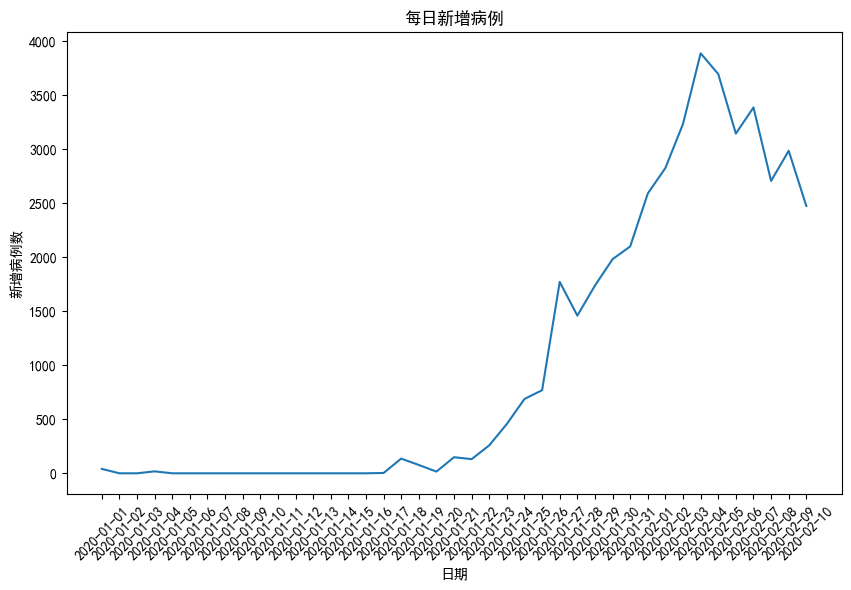

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# 读取数据
data = pd.read_csv("新增确诊人数.csv")
# 提取日期和每日新增病例数
dates = data["date"]
confirmed_cases = data["confirmed_cases"]
# 计算每日新增病例数
daily_cases = confirmed_cases.diff().fillna(confirmed_cases[0]).astype(int)
# 绘制每日新增病例数的折线图
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dates, daily_cases)
ax.set_title("每日新增病例")
plt.xticks(rotation=45)
ax.set_xlabel("日期")
ax.set_ylabel("新增病例数")
plt.show()


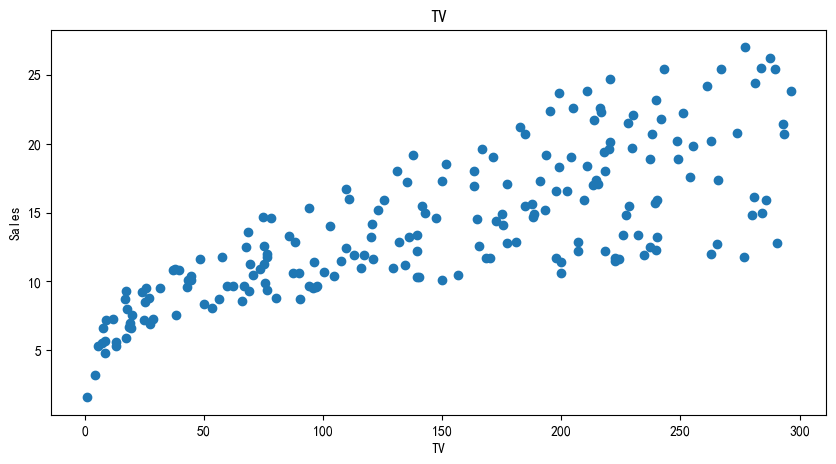

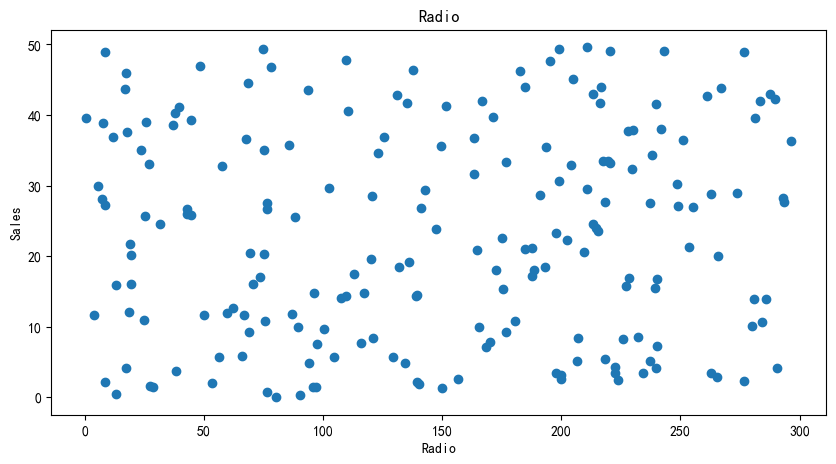

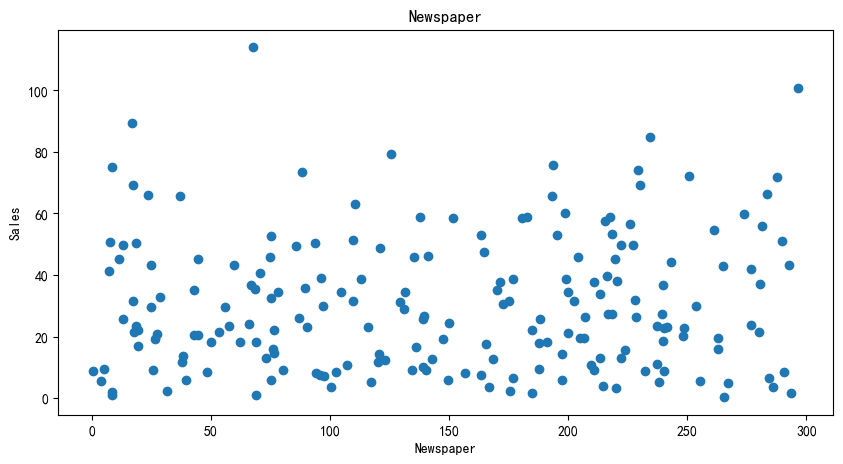

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# 绘制散点图
data = pd.read_csv('广告数据集.CSV')
plt.figure(figsize=(10, 5))
plt.scatter(data['TV'], data['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV')
plt.show()
plt.figure(figsize=(10, 5))
plt.scatter(data['TV'], data['radio'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio')
plt.show()
plt.figure(figsize=(10, 5))
plt.scatter(data['TV'], data['newspaper'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 读取广告数据集
df = pd.read_csv('广告数据集.csv')
# 将数据集分为特征和标签
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']
# 创建线性回归模型
model = LinearRegression()
# 使用特征和标签训练模型
model.fit(X, y)
# 打印模型的截距和系数
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
# 预测销售收益
sample = np.array([[100, 25, 25]])
predicted_sales = model.predict(sample)
print('Predicted sales:', predicted_sales)
# 绘制预测结果
plt.scatter(y, model.predict(X))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.show()
